In [1]:
# ! pip install kaggle
# ! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets download -d lucidlenn/sloan-digital-sky-survey

# !unzip sloan-digital-sky-survey.zip
# !rm  sloan-digital-sky-survey.zip

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier    
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from  sklearn.model_selection import GridSearchCV

import  warnings; warnings.filterwarnings('ignore')
%matplotlib inline 

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))


In [3]:
data=pd.read_csv("../input/sloan-digital-sky-survey/Skyserver_SQL2_27_2018 6_51_39 PM.csv" )
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [5]:
data.drop(["objid","specobjid"],axis=1,inplace=True)

In [6]:
data.columns

Index(['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol', 'field',
       'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

<AxesSubplot:xlabel='class', ylabel='count'>

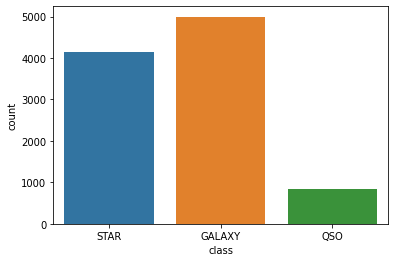

In [7]:
sns.countplot(x=data["class"])

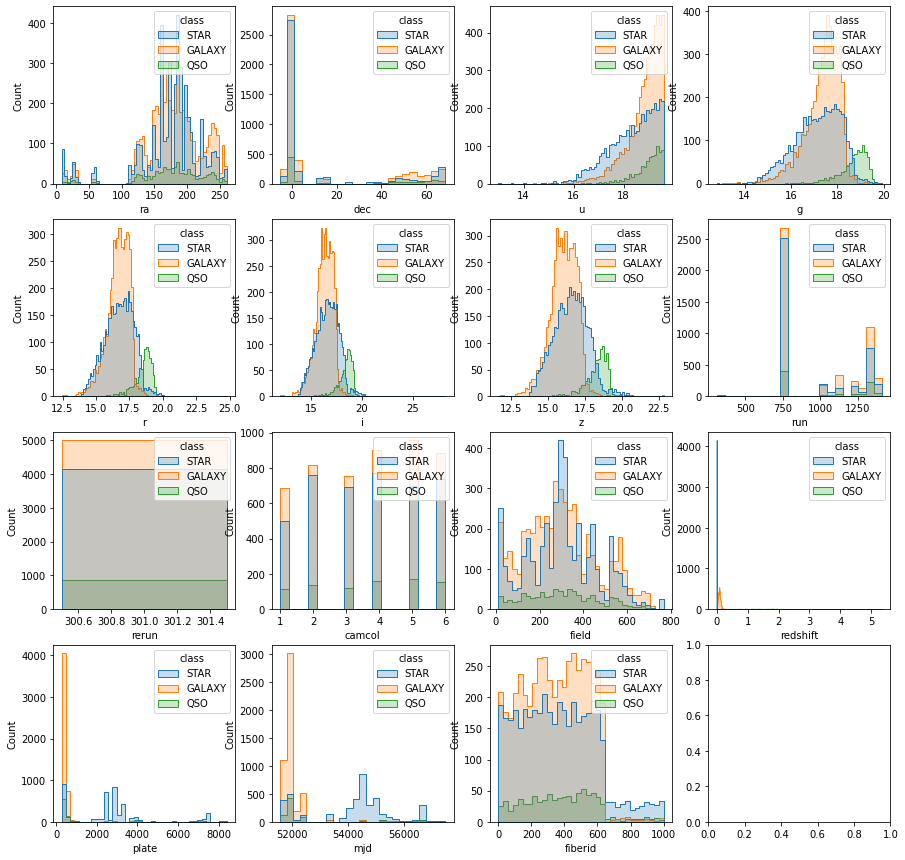

In [8]:
col=[ 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol','field','redshift', 'plate', 'mjd', 'fiberid']
plt.subplots(4,4,figsize=(15,15)) 
for i in  range(len(col)):  
    plt.subplot(4,4,i+1)
    sns.histplot(data,x=col[i],hue="class",element="step")
    plt.xlabel(col[i])


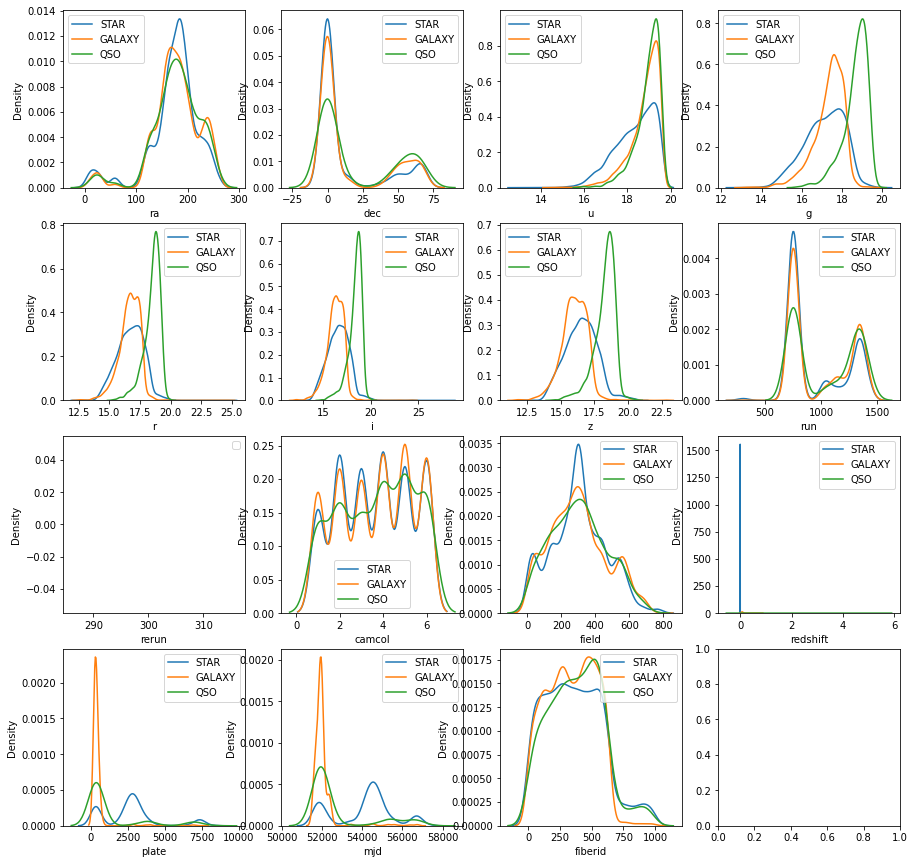

In [9]:
col=[ 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field','redshift', 'plate', 'mjd', 'fiberid']#'class'
plt.subplots(4,4,figsize=(15,15)) 
for i in  range(len(col)):  
    plt.subplot(4,4,i+1)
    sns.distplot(data.loc[data["class"]=="STAR",col[i]],hist=False,label="STAR")
    sns.distplot(data.loc[data["class"]=="GALAXY",col[i]],hist=False,label="GALAXY")
    sns.distplot(data.loc[data["class"]=="QSO",col[i]],hist=False,label="QSO")
    plt.xlabel(col[i])
    plt.legend()

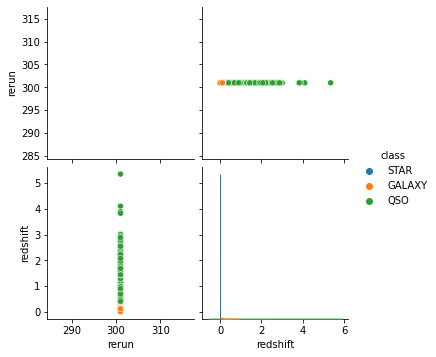

In [10]:
sns.pairplot(data=data[['rerun', 'redshift','class']],hue='class')

In [11]:
for col in ['rerun', 'redshift']:
   print (col,"=>",data[col].unique(),"count =>",len( data[col].unique() ))

rerun => [301] count => 1
redshift => [-8.960000e-06 -5.490000e-05  1.231112e-01 ... -4.015730e-04  1.401894e-02
  1.184173e-01] count => 9637


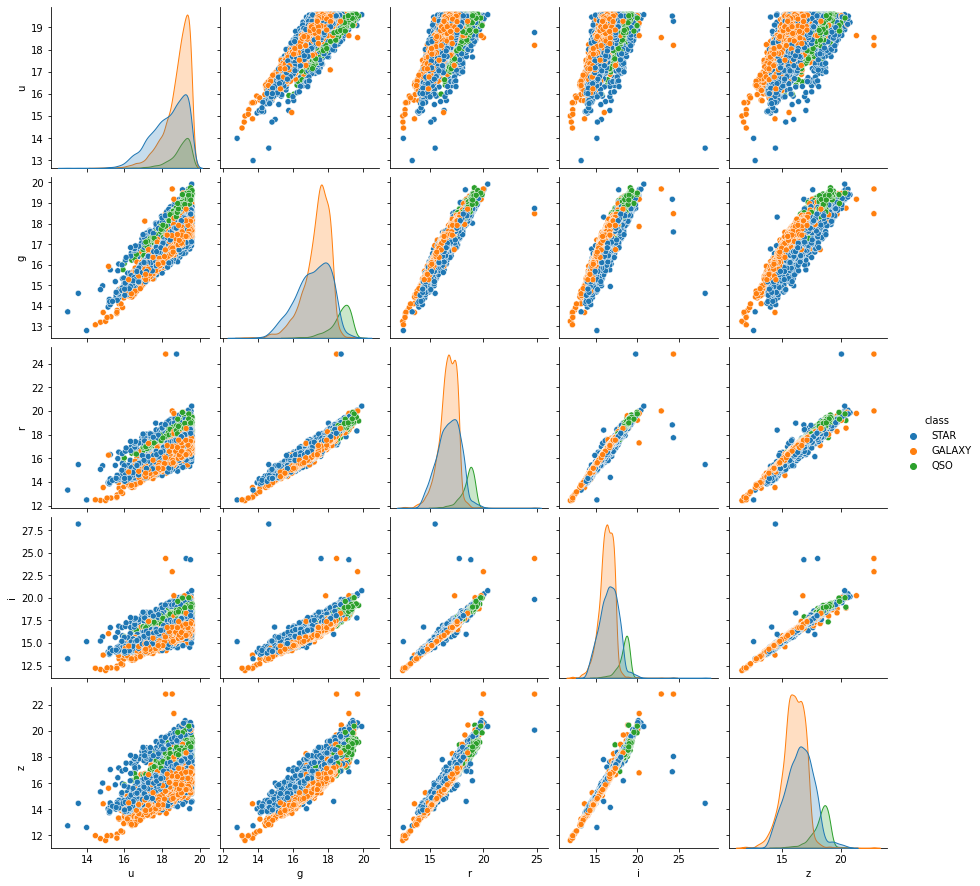

In [12]:
sns.pairplot(data=data[['u', 'g', 'r', 'i', 'z','class']],hue='class')

In [13]:
X=data.drop(["class"],axis=1)
Y=data["class"]
Y=Y.map({"GALAXY":3,"STAR":2,"QSO":1})
print(Y.unique())

[2 3 1]


In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33,stratify=Y, random_state=42, shuffle =True)


In [15]:
svm_clf=SVC()
svm_clf.fit(x_train,y_train)
print("train score: ",svm_clf.score(x_train,y_train))
print("-"*20)
pred=svm_clf.predict(x_test)
print(confusion_matrix(pred,y_test))
print("-"*20)
accuracy_score(pred,y_test)

train score:  0.7953731343283582
--------------------
[[   0    0    0]
 [  55 1030   40]
 [ 226  340 1609]]
--------------------


0.7996969696969697

In [16]:
randomforest=RandomForestClassifier()
randomforest.fit(x_train,y_train)
print("train score: ",randomforest.score(x_train,y_train))
print("-"*20)
pred=randomforest.predict(x_test)
print(confusion_matrix(pred,y_test))
print("-"*20)
accuracy_score(pred,y_test)

train score:  1.0
--------------------
[[ 255    0    2]
 [   0 1369    7]
 [  26    1 1640]]
--------------------


0.9890909090909091

In [17]:
pramter=[{'criterion' :['gini', 'entropy'], 'max_leaf_nodes': list(range(10,20))   },
         {'criterion' :['gini', 'entropy'], 'max_depth': list(range(5,20))   }]
GridSearchCV=GridSearchCV(estimator=RandomForestClassifier(),param_grid=pramter,cv=3,return_train_score=True)
GridSearchCV.fit(x_train,y_train)
print('Best Score is :', GridSearchCV.best_score_)
print('Best Parameters are :', GridSearchCV.best_params_)

Best Score is : 0.9894032741561528
Best Parameters are : {'criterion': 'gini', 'max_depth': 17}


In [18]:
randomforest=RandomForestClassifier(criterion="gini",max_depth= 16)
randomforest.fit(X,Y)
print("train score: ",randomforest.score(X,Y))
print("-"*20)
pred=randomforest.predict(X)
print(confusion_matrix(pred,Y))
print("-"*20)
accuracy_score(pred,Y)

train score:  0.9989
--------------------
[[ 839    0    0]
 [   0 4152    0]
 [  11    0 4998]]
--------------------


0.9989